In [14]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sentencepiece as spm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


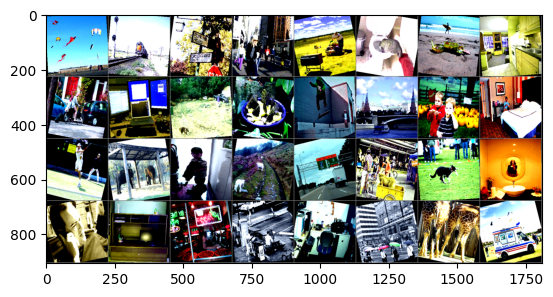

In [6]:
image_dir = 'custom_captions_dataset/train'

# Defining the image preprocessing and data augmentation transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the custom dataset class
class ImageCaptioningDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image

# Create the dataset and dataloader
dataset = ImageCaptioningDataset(image_dir, transform=preprocess)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images = next(iter(dataloader))

imshow(torchvision.utils.make_grid(images))

In [19]:
#Loading the captions
train_captions = pd.read_csv('custom_captions_dataset/train.csv')
train_captions.drop('Unnamed: 0', axis=1, inplace=True)

print(train_captions.head())

train_captions = train_captions['caption'].values

# Writing the captions to a text file
with open('custom_captions_dataset/train_captions.txt', 'w') as f:
    for caption in train_captions:
        f.write(caption + '\n')

      filename                                            caption
0  train_1.jpg  A white round plate is on a table with a plast...
1  train_2.jpg  There are four small pizzas on a brown wooden ...
2  train_3.jpg  A black and white cat is sitting in a white ch...
3  train_4.jpg  A boy is practicing his skateboard moves outsi...
4  train_5.jpg  Two brown horses are standing together outside...


In [29]:
#Training the sentence piece model
spm.SentencePieceTrainer.train(input='custom_captions_dataset/train_captions.txt', model_prefix='spm', model_type='bpe', character_coverage=1.0, pad_id = 3)

sp = spm.SentencePieceProcessor(model_file='spm.model')

# Printing the vocabulary and size
print('Vocabulary size:', sp.get_piece_size())

Vocabulary size: 8000


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: custom_captions_dataset/train_captions.txt
  input_format: 
  model_prefix: spm
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 3
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_pri

. max_freq=3 min_freq=2
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5620 all=14695 active=1027 piece=gly
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5640 all=14725 active=1057 piece=osc
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5660 all=14746 active=1078 piece=▁Do
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5680 all=14764 active=1096 piece=acht
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5700 all=14779 active=1111 piece=gray
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=3 min_freq=2
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5720 all=14798 active=1020 piece=otic
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5740 all=14811 active=1033 piece=uted
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5760 all=14827 active=1049 piece=▁Mac
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5780 all=14828 active=1050 piece=▁hue
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=3 size=5800